In [1]:
# STEP 1 – Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# STEP 2 – Load Dataset
# (Upload your CSV in Colab: click Files → Upload, or mount Drive)
data = pd.read_csv("oral_cancer_prediction_preprocessed_dataset_new.csv")

In [3]:
# STEP 3 – Understand the Data
print("Shape:", data.shape)
print("\nColumns:\n", data.columns)
print("\nFirst 5 rows:\n", data.head())


Shape: (82715, 16)

Columns:
 Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'Oral Cancer (Diagnosis)'],
      dtype='object')

First 5 rows:
         PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.699575  0.313334  0.560447 -0.336918 -1.106020 -0.598798 -1.297696   
1  0.673053 -0.184050  0.576740  1.757344  0.923448  0.746739  0.469264   
2  0.048024 -1.360864 -0.405148 -1.030663  0.777152 -0.456549 -1.895424   
3  1.604668  1.710142 -1.364305 -0.267710 -1.416786  0.038920  1.422042   
4 -2.382625 -1.884699 -0.133362  0.650046 -0.265694 -1.245969  1.377394   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.724275 -1.637012 -0.821648 -0.459853 -1.457710 -1.369914 -0.223944   
1  1.723204  1.723343  0.136200 -0.024877 -1.790372 -1.337522 -0.206183   
2  1.622114 -1.418006  0.072663 -0.075828 -1.864626  0.332051  0.028287   
3  0.459523  0.031274 -0.796

In [5]:
# STEP 4 – Split Features (X) and Target (y)

# Clean up column names (remove leading/trailing spaces)
data.columns = data.columns.str.strip()

# Print column names to verify
print("Columns in dataset:", data.columns.tolist())

# --- OPTION 1: If you know your target column name, set it here ---
# target_column = 'Oral Cancer Diagnosis'  # <- change this if different

# --- OPTION 2: Automatically use the last column as target (safe choice) ---
target_column = data.columns[-1]

print("Using target column:", target_column)

# Split features (X) and target (y)
X = data.drop(target_column, axis=1)
y = data[target_column]

print("X shape:", X.shape)
print("y shape:", y.shape)


Columns in dataset: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'Oral Cancer (Diagnosis)']
Using target column: Oral Cancer (Diagnosis)
X shape: (82715, 15)
y shape: (82715,)


In [6]:
# STEP 5 – Split into Training and Testing Sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [7]:
# STEP 6 – Train Base Decision Tree Model
dt_base = DecisionTreeClassifier(random_state=42)
dt_base.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [8]:
# STEP 7 – Predictions & Evaluation
y_pred = dt_base.predict(X_test)


--- Base Model Evaluation ---
Accuracy : 0.5089766064196337
Precision: 0.5311384371281238
Recall   : 0.46741912962532
F1 Score : 0.49724577582471996


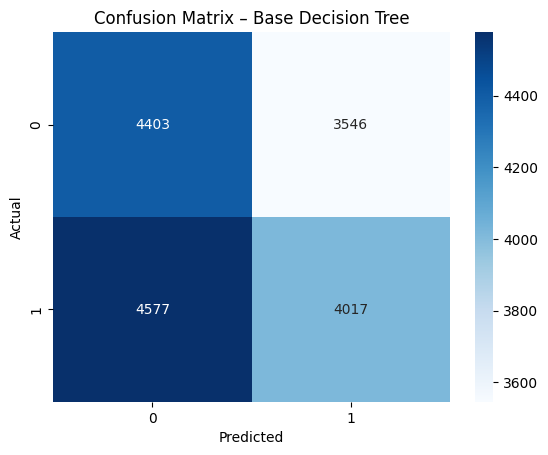

In [10]:

print("\n--- Base Model Evaluation ---")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix – Base Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [11]:
# STEP 8 – Hyperparameter Tuning
param_grid = {
    'max_depth': [2, 4, 6, 8, 10, None],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)
grid.fit(X_train, y_train)

print("\nBest Parameters:", grid.best_params_)


Best Parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [12]:
# STEP 9 – Evaluate Tuned Model
best_dt = grid.best_estimator_
y_pred_best = best_dt.predict(X_test)

print("\n--- Tuned Model Evaluation ---")
print("Accuracy :", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall   :", recall_score(y_test, y_pred_best))
print("F1 Score :", f1_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))


--- Tuned Model Evaluation ---
Accuracy : 0.5199177900018135
Precision: 0.5199217795160107
Recall   : 0.9899930183849197
F1 Score : 0.6817853994711115

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.01      0.02      7949
           1       0.52      0.99      0.68      8594

    accuracy                           0.52     16543
   macro avg       0.52      0.50      0.35     16543
weighted avg       0.52      0.52      0.37     16543



/tmp/ipython-input-3901754772.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=importances.index, palette="viridis")


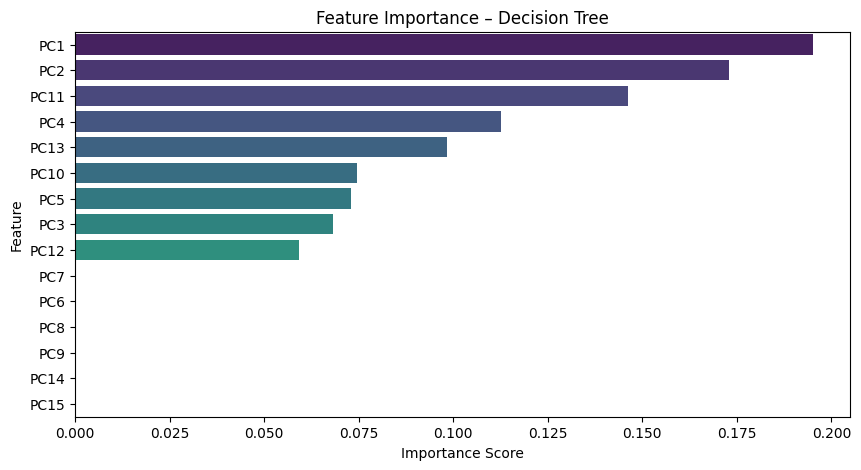

In [13]:
# STEP 10 – Feature Importance
importances = pd.Series(best_dt.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=importances, y=importances.index, palette="viridis")
plt.title("Feature Importance – Decision Tree")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


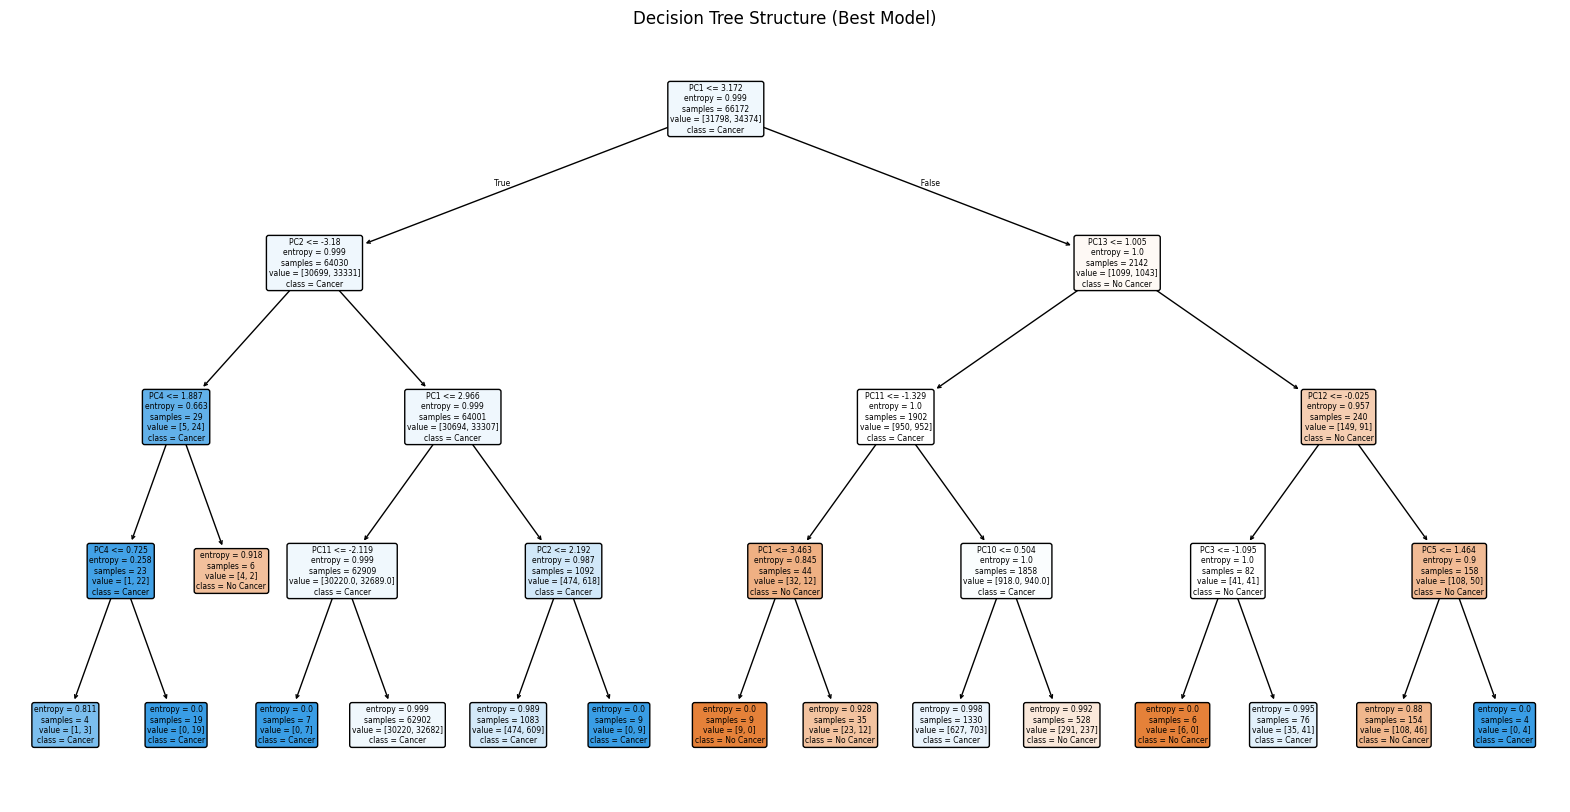

In [14]:
# STEP 11 – Visualize the Tree (Optional)
plt.figure(figsize=(20,10))
plot_tree(best_dt, filled=True, feature_names=X.columns, class_names=['No Cancer','Cancer'], rounded=True)
plt.title("Decision Tree Structure (Best Model)")
plt.show()